In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data

In [2]:
def rename_columns(dataframe, mapping_dict):
    """
    Rename columns in the given DataFrame using a mapping dictionary.

    Args:
    - dataframe (pd.DataFrame): The pandas DataFrame with the original column names.
    - mapping_dict (dict): A dictionary where keys are current column names and values are the new column names.

    Returns:
    - pd.DataFrame: DataFrame with renamed columns.
    """
    # Rename the columns using the provided mapping dictionary
    renamed_df = dataframe.rename(columns=mapping_dict)
    
    return renamed_df

# Define the mapping dictionary
mapping_dict = {
  "R0000100": "ID# 79",
  "R0000149": "HOUSEHOLD ID#",
  "R0000600": "AGE OF R 79",
  "R0001800": "AREA RESIDENCE @ AGE 14 URBAN/RURAL 79",
  "R0008800": "RS MOTHER AND FATHER LIVE IN SAME HH 79",
  "R0009100": "# OF SIBS 79",
  "R0009600": "1ST/ONLY RACL/ETHNIC ORIGIN 79",
  "R0010300": "RELGN R RAISED COLLAPSED 79",
  "R0010400": "PRSNT RELGS AFFILIATION 79",
  "R0010500": "FREQ RELGS ATTENDANCE R 79",
  "R0010600": "MARITAL STATUS 79",
  "R0013200": "# CHILDREN IDEAL FOR FAMILY 79",
  "R0013400": "# CHILDREN R HAD 79",
  "R0015300": "TOT# CHILDREN EXPCT HAVE 79",
  "R0145100": "ICHK HLTH LIMITATIONS I2A/2B YES",
  "R0146100": "ICHK MAIN HLTH COND CAUSE WRK LIMITS 79",
  "R0149800": "PERSON INFLUENCE R DEC NO CHILDREN 79",
  "R0149900": "ATND R DEC PURSUE CAREER DELAY FAM 79",
  "R0173600": "SAMPLE ID  79 INT",
  "R0214700": "RACL/ETHNIC COHORT /SCRNR 79",
  "R0214800": "SEX OF R 79",
  "R0216400": "REGION OF CURRENT RESIDENCE 79",
  "R0216601": "ENROLLMT STAT MAY 1 SURVEY YR (REV) 79",
  "R0217900": "TOT NET FAMILY INC P-C YR 79",
  "R0217910": "POVERTY STATUS 79",
  "T0857100": "# BIO CHILDREN REPORTED 2006",
  "T2015100": "# BIO CHILDREN REPORTED 2008",
  "T2998600": "# BIO CHILDREN REPORTED 2010",
  "T3942500": "# BIO CHILDREN REPORTED 2012",
  "T4876800": "# BIO CHILDREN REPORTED 2014",
  "T5593000": "# BIO CHILDREN REPORTED 2016",
}

def collabels(data):
    return rename_columns(data, mapping_dict)

def collabels(data):
    return rename_columns(data, mapping_dict)
other_columns = ["ID# 79"]

categorical_columns = ["AREA RESIDENCE @ AGE 14 URBAN/RURAL 79",
                      "1ST/ONLY RACL/ETHNIC ORIGIN 79",
                      "RELGN R RAISED COLLAPSED 79",
                      "PRSNT RELGS AFFILIATION 79",
                      "MARITAL STATUS 79",
                      "ICHK MAIN HLTH COND CAUSE WRK LIMITS 79",
                      "PERSON INFLUENCE R DEC NO CHILDREN 79",
                      "ATND R DEC PURSUE CAREER DELAY FAM 79",
                      "SAMPLE ID  79 INT",
                      "RACL/ETHNIC COHORT /SCRNR 79",
                      "REGION OF CURRENT RESIDENCE 79",
                      "ENROLLMT STAT MAY 1 SURVEY YR (REV) 79",
                      "POVERTY STATUS 79",]

binary_columns = ["ICHK HLTH LIMITATIONS I2A/2B YES"]

continuous_columns = ["AGE OF R 79", "# OF SIBS 79",
                     "FREQ RELGS ATTENDANCE R 79",
                     "# CHILDREN R HAD 79",
                     "TOT# CHILDREN EXPCT HAVE 79",
                     "# CHILDREN IDEAL FOR FAMILY 79",
                     "TOT NET FAMILY INC P-C YR 79",
                     '# BIO CHILDREN REPORTED']



In [3]:
def val_cat_labels(data):
    """
    Map numerical values of categorical variables to textual value.
    :param data: dataframe
    :return: dataframe
    """
    # Missing values mapping
    # TODO - delete
    missing = {
        -5.0: -5.0,
        -4.0: -4.0,
        -3.0: -3.0,
        -2.0: -2.0,
        -1.0: -1.0
    }
        
    # Mapping for R0001800
    data[mapping_dict['R0001800']] = data[mapping_dict['R0001800']].map(missing | {
        1.0: "IN TOWN OR CITY",
        2.0: "IN COUNTRY-NOT FARM",
        3.0: "ON FARM OR RANCH"
    })
    
    """ # Decide to work without "RS MOTHER AND FATHER LIVE IN SAME HH 79"
    # Mapping for R0008800 
    data[mapping_dict['R0008800']] = data[mapping_dict['R0008800']].map(missing | {
        0.0: "NO",
        1.0: "YES"
    })
    """

    # Mapping for R0009600
    data[mapping_dict['R0009600']] = data[mapping_dict['R0009600']].map(missing | {
        0.0: "NONE", 1.0: "BLACK", 2.0: "CHINESE", 3.0: "ENGLISH", 4.0: "FILIPINO",
        5.0: "FRENCH", 6.0: "GERMAN", 7.0: "GREEK", 8.0: "HAWAIIAN, P.I.",
        9.0: "INDIAN-AMERICAN OR NATIVE AMERICAN", 10.0: "ASIAN INDIAN", 11.0: "IRISH",
        12.0: "ITALIAN", 13.0: "JAPANESE", 14.0: "KOREAN", 15.0: "CUBAN",
        16.0: "CHICANO", 17.0: "MEXICAN", 18.0: "MEXICAN-AMER", 19.0: "PUERTO RICAN",
        20.0: "OTHER HISPANIC", 21.0: "OTHER SPANISH", 22.0: "POLISH",
        23.0: "PORTUGUESE", 24.0: "RUSSIAN", 25.0: "SCOTTISH", 26.0: "VIETNAMESE",
        27.0: "WELSH", 28.0: "OTHER", 29.0: "AMERICAN"
    })

    # Mapping for R0010300 and R0010400 (same mapping)
    religion_mapping = missing | {
        0.0: "NONE, NO RELIGION", 1.0: "PROTESTANT", 2.0: "BAPTIST", 3.0: "EPISCOPALIAN",
        4.0: "LUTHERAN", 5.0: "METHODIST", 6.0: "PRESBYTERIAN", 7.0: "ROMAN CATHOLIC",
        8.0: "JEWISH", 9.0: "OTHER"
    }
    data[mapping_dict['R0010300']] = data[mapping_dict['R0010300']].map(religion_mapping)
    data[mapping_dict['R0010400']] = data[mapping_dict['R0010400']].map(religion_mapping)
    
    """
    # Mapping for R0010500
    data[mapping_dict['R0010500']] = data[mapping_dict['R0010500']].map(missing | {
        1.0: "NOT AT ALL", 2.0: "INFREQUENTLY", 3.0: "ONCE PER MONTH",
        4.0: "2-3 TIMES PER MONTH", 5.0: "ONCE PER WEEK", 6.0: "> ONCE PER WEEK"
    })
    """

    # Mapping for R0010600
    data[mapping_dict['R0010600']] = data[mapping_dict['R0010600']].map(missing | {
        1.0: "PRESENTLY MARRIED", 2.0: "WIDOWED", 3.0: "DIVORCED",
        4.0: "SEPARATED", 5.0: "NEVER MARRIED-ANNUL"
    })

    # Mapping for R0145100
    data[mapping_dict['R0145100']] = data[mapping_dict['R0145100']].map(missing | {
        0.0: "NO", 1.0: "YES"
    })

    # Mapping for R0146100
    data[mapping_dict['R0146100']] = data[mapping_dict['R0146100']].map(missing | {
        0.0: "UNKNOWN", 1.0: "ACCIDENT-INJURY", 2.0: "IN BOX B", 3.0: "NEITHER",
        4.0: "NORMAL PREGNANCY", 5.0: "NORMAL DELIVERY", 6.0: "VASECTOMY-T.L."
    })

    # Mapping for R0149800 and R0149900 (same mapping)
    approval_mapping = missing | {
        0.0: "UNKNOWN", 1.0: "STRONGLY DISAPPROVE", 2.0: "SOMEWHAT DISAPPROVE",
        3.0: "SOMEWHAT APPROVE", 4.0: "STRONGLY APPROVE", 8.0: "DONT KNOW"
    }
    data[mapping_dict['R0149800']] = data[mapping_dict['R0149800']].map(approval_mapping)
    data[mapping_dict['R0149900']] = data[mapping_dict['R0149900']].map(approval_mapping)

    # Mapping for R0173600
    data[mapping_dict['R0173600']] = data[mapping_dict['R0173600']].map(missing | {
        1.0: "CROSS MALE WHITE", 2.0: "CROSS MALE WH. POOR", 3.0: "CROSS MALE BLACK",
        4.0: "CROSS MALE HISPANIC", 5.0: "CROSS FEMALE WHITE", 6.0: "CROSS FEMALE WH POOR",
        7.0: "CROSS FEMALE BLACK", 8.0: "CROSS FEMALE HISPANIC", 9.0: "SUP MALE WH POOR",
        10.0: "SUP MALE BLACK", 11.0: "SUP MALE HISPANIC", 12.0: "SUP FEM WH POOR",
        13.0: "SUP FEMALE BLACK", 14.0: "SUP FEMALE HISPANIC", 15.0: "MIL MALE WHITE",
        16.0: "MIL MALE BLACK", 17.0: "MIL MALE HISPANIC", 18.0: "MIL FEMALE WHITE",
        19.0: "MIL FEMALE BLACK", 20.0: "MIL FEMALE HISPANIC"
    })

    # Mapping for R0214700
    data[mapping_dict['R0214700']] = data[mapping_dict['R0214700']].map(missing | {
        1.0: "HISPANIC", 2.0: "BLACK", 3.0: "NON-BLACK, NON-HISPANIC"
    })
    
    """ # No need for "SEX OF R 79", all samples are female
    # Mapping for R0214800
    data[mapping_dict['R0214800']] = data[mapping_dict['R0214800']].map(missing | {
        1.0: "MALE", 2.0: "FEMALE"
    })
    """

    # Mapping for R0216400
    data[mapping_dict['R0216400']] = data[mapping_dict['R0216400']].map(missing | {
        1.0: "NORTHEAST", 2.0: "NORTH CENTRAL", 3.0: "SOUTH", 4.0: "WEST"
    })

    # Mapping for R0216601
    data[mapping_dict['R0216601']] = data[mapping_dict['R0216601']].map(missing | {
        1.0: "NOT ENROLLED, COMPLETED LESS THAN 12TH GRADE", 2.0: "ENROLLED IN HIGH SCHOOL",
        3.0: "ENROLLED IN COLLEGE", 4.0: "NOT ENROLLED, HIGH SCHOOL GRADUATE"
    })

    # Mapping for R0217910
    data[mapping_dict['R0217910']] = data[mapping_dict['R0217910']].map(missing | {
        0.0: "NOT IN POVERTY", 1.0: "IN POVERTY", 2.0: "UNKNOWN"
    })

    return data

In [4]:
def load_and_basic_preprocessing(path):
    """
    Loads data from csv file and returns preprocessed (basic) data.
    :param path: path to file
    :return: dataframe
    """
    data = pd.read_csv(path)
    data = collabels(data)
    return data

In [5]:
file_path = './data/default.csv'  # Replace with the correct path
df = load_and_basic_preprocessing(file_path)
hh_path = './data/household_info/household_info.csv'
hhdf = load_and_basic_preprocessing(hh_path)

In [6]:
# merge dataframes to include household ID
df = pd.merge(df, hhdf, how='inner')

In [7]:
df

,ID# 79,AGE OF R 79,AREA RESIDENCE @ AGE 14 URBAN/RURAL 79,RS MOTHER AND FATHER LIVE IN SAME HH 79,# OF SIBS 79,1ST/ONLY RACL/ETHNIC ORIGIN 79,RELGN R RAISED COLLAPSED 79,PRSNT RELGS AFFILIATION 79,FREQ RELGS ATTENDANCE R 79,MARITAL STATUS 79,...,ENROLLMT STAT MAY 1 SURVEY YR (REV) 79,TOT NET FAMILY INC P-C YR 79,POVERTY STATUS 79,# BIO CHILDREN REPORTED 2006,# BIO CHILDREN REPORTED 2008,# BIO CHILDREN REPORTED 2010,# BIO CHILDREN REPORTED 2012,# BIO CHILDREN REPORTED 2014,# BIO CHILDREN REPORTED 2016,HOUSEHOLD ID#
0,1,20,1,-4,1,12,7,7,5,5,...,4,30000,0,-5,-5,-5,-5,-5,-5,1
1,2,20,1,-4,8,12,7,7,5,5,...,1,20000,0,2,2,2,2,2,2,2
2,3,17,1,-4,3,5,7,7,2,5,...,1,22390,0,3,3,-5,3,3,3,3
3,4,16,1,-4,3,3,7,7,1,5,...,2,22390,0,-5,-5,-5,-5,-5,2,3
4,5,19,1,-4,1,5,7,7,1,5,...,3,36000,0,-5,-5,-5,-5,-5,-5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12681,12682,19,3,0,8,11,7,7,4,5,...,1,5528,0,-5,-5,-5,-5,-5,-5,12682
12682,12683,19,1,0,14,11,2,2,1,1,...,4,-3,-3,-5,-5,-5,-5,-5,-5,12683
12683,12684,19,1,1,3,3,7,0,2,5,...,1,6200,0,-5,-5,-5,-5,-5,-5,12684
12684,12685,22,1,-4,7,1,2,9,4,5,...,4,6000,1,-5,-5,-5,-5,-5,-5,12685


In [8]:
df.describe()

,ID# 79,AGE OF R 79,AREA RESIDENCE @ AGE 14 URBAN/RURAL 79,RS MOTHER AND FATHER LIVE IN SAME HH 79,# OF SIBS 79,1ST/ONLY RACL/ETHNIC ORIGIN 79,RELGN R RAISED COLLAPSED 79,PRSNT RELGS AFFILIATION 79,FREQ RELGS ATTENDANCE R 79,MARITAL STATUS 79,...,ENROLLMT STAT MAY 1 SURVEY YR (REV) 79,TOT NET FAMILY INC P-C YR 79,POVERTY STATUS 79,# BIO CHILDREN REPORTED 2006,# BIO CHILDREN REPORTED 2008,# BIO CHILDREN REPORTED 2010,# BIO CHILDREN REPORTED 2012,# BIO CHILDREN REPORTED 2014,# BIO CHILDREN REPORTED 2016,HOUSEHOLD ID#
count,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,...,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000,12686.00000,12686.000000,12686.000000,12686.000000
mean,6343.500000,17.898155,1.250355,-2.899101,3.844238,8.284093,4.766672,4.436544,3.147012,4.548873,...,2.517184,11818.653870,-0.389327,-2.521599,-2.483683,-2.537285,-2.61154,-2.685480,-2.734905,6337.116191
std,3662.277092,2.305593,0.595666,1.980768,2.652257,8.425369,2.789577,3.020002,1.709369,1.243832,...,1.045129,12643.067283,1.347419,3.197205,3.211849,3.201520,3.18619,3.162067,3.146451,3657.983694
min,1.000000,14.000000,-3.000000,-4.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,...,-3.000000,-3.000000,-3.000000,-5.000000,-5.000000,-5.000000,-5.00000,-5.000000,-5.000000,1.000000
25%,3172.250000,16.000000,1.000000,-4.000000,2.000000,1.000000,2.000000,2.000000,2.000000,5.000000,...,2.000000,2852.750000,0.000000,-5.000000,-5.000000,-5.000000,-5.00000,-5.000000,-5.000000,3171.000000
50%,6343.500000,18.000000,1.000000,-4.000000,3.000000,5.000000,5.000000,5.000000,3.000000,5.000000,...,2.000000,7955.000000,0.000000,-4.000000,-4.000000,-4.000000,-4.00000,-4.000000,-4.000000,6338.500000
75%,9514.750000,20.000000,1.000000,-4.000000,5.000000,12.000000,7.000000,7.000000,5.000000,5.000000,...,4.000000,18000.000000,0.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,9505.000000
max,12686.000000,22.000000,3.000000,1.000000,29.000000,29.000000,9.000000,9.000000,6.000000,5.000000,...,4.000000,75001.000000,1.000000,11.000000,11.000000,11.000000,11.00000,11.000000,11.000000,12686.000000


In [9]:
# Rename the columns
df = rename_columns(df, mapping_dict)

# Display the first few rows of the renamed DataFrame
print(df.shape)
df.head()

(12686, 31)


,ID# 79,AGE OF R 79,AREA RESIDENCE @ AGE 14 URBAN/RURAL 79,RS MOTHER AND FATHER LIVE IN SAME HH 79,# OF SIBS 79,1ST/ONLY RACL/ETHNIC ORIGIN 79,RELGN R RAISED COLLAPSED 79,PRSNT RELGS AFFILIATION 79,FREQ RELGS ATTENDANCE R 79,MARITAL STATUS 79,...,ENROLLMT STAT MAY 1 SURVEY YR (REV) 79,TOT NET FAMILY INC P-C YR 79,POVERTY STATUS 79,# BIO CHILDREN REPORTED 2006,# BIO CHILDREN REPORTED 2008,# BIO CHILDREN REPORTED 2010,# BIO CHILDREN REPORTED 2012,# BIO CHILDREN REPORTED 2014,# BIO CHILDREN REPORTED 2016,HOUSEHOLD ID#
0,1,20,1,-4,1,12,7,7,5,5,...,4,30000,0,-5,-5,-5,-5,-5,-5,1
1,2,20,1,-4,8,12,7,7,5,5,...,1,20000,0,2,2,2,2,2,2,2
2,3,17,1,-4,3,5,7,7,2,5,...,1,22390,0,3,3,-5,3,3,3,3
3,4,16,1,-4,3,3,7,7,1,5,...,2,22390,0,-5,-5,-5,-5,-5,2,3
4,5,19,1,-4,1,5,7,7,1,5,...,3,36000,0,-5,-5,-5,-5,-5,-5,5


In [10]:
# keep only female responders and drop the sex column
df = df[df['SEX OF R 79'] == 2]
df = df.drop("SEX OF R 79", axis=1)
df

,ID# 79,AGE OF R 79,AREA RESIDENCE @ AGE 14 URBAN/RURAL 79,RS MOTHER AND FATHER LIVE IN SAME HH 79,# OF SIBS 79,1ST/ONLY RACL/ETHNIC ORIGIN 79,RELGN R RAISED COLLAPSED 79,PRSNT RELGS AFFILIATION 79,FREQ RELGS ATTENDANCE R 79,MARITAL STATUS 79,...,ENROLLMT STAT MAY 1 SURVEY YR (REV) 79,TOT NET FAMILY INC P-C YR 79,POVERTY STATUS 79,# BIO CHILDREN REPORTED 2006,# BIO CHILDREN REPORTED 2008,# BIO CHILDREN REPORTED 2010,# BIO CHILDREN REPORTED 2012,# BIO CHILDREN REPORTED 2014,# BIO CHILDREN REPORTED 2016,HOUSEHOLD ID#
0,1,20,1,-4,1,12,7,7,5,5,...,4,30000,0,-5,-5,-5,-5,-5,-5,1
1,2,20,1,-4,8,12,7,7,5,5,...,1,20000,0,2,2,2,2,2,2,2
2,3,17,1,-4,3,5,7,7,2,5,...,1,22390,0,3,3,-5,3,3,3,3
3,4,16,1,-4,3,3,7,7,1,5,...,2,22390,0,-5,-5,-5,-5,-5,2,3
7,8,20,1,1,7,3,9,9,2,1,...,4,7227,0,3,3,3,3,3,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12671,12672,20,1,1,1,11,7,7,1,5,...,4,3500,0,-5,-5,-5,-5,-5,-5,12672
12672,12673,19,1,1,2,11,1,7,2,5,...,4,3050,1,-5,-5,-5,-5,-5,-5,12673
12673,12674,19,1,1,15,1,5,5,6,5,...,4,1600,1,-5,-5,-5,-5,-5,-5,12674
12674,12675,20,3,1,3,6,2,2,1,5,...,4,6800,0,-5,-5,-5,-5,-5,-5,12675


In [11]:
print(*categorical_columns, sep="\n")
print(df.select_dtypes('object').columns)

AREA RESIDENCE @ AGE 14 URBAN/RURAL 79
1ST/ONLY RACL/ETHNIC ORIGIN 79
RELGN R RAISED COLLAPSED 79
PRSNT RELGS AFFILIATION 79
MARITAL STATUS 79
ICHK MAIN HLTH COND CAUSE WRK LIMITS 79
PERSON INFLUENCE R DEC NO CHILDREN 79
ATND R DEC PURSUE CAREER DELAY FAM 79
SAMPLE ID  79 INT
RACL/ETHNIC COHORT /SCRNR 79
REGION OF CURRENT RESIDENCE 79
ENROLLMT STAT MAY 1 SURVEY YR (REV) 79
POVERTY STATUS 79
Index([], dtype='object')


In [12]:
columns_to_consider = [
    '# BIO CHILDREN REPORTED 2006',
    '# BIO CHILDREN REPORTED 2008',
    '# BIO CHILDREN REPORTED 2010',
    '# BIO CHILDREN REPORTED 2012',
    '# BIO CHILDREN REPORTED 2014',
    '# BIO CHILDREN REPORTED 2016'
]

# Create a new column with the maximum value from the selected columns
df['# BIO CHILDREN REPORTED'] = df[columns_to_consider].max(axis=1)
#df['# BIO CHILDREN REPORTED'] = df['# BIO CHILDREN REPORTED 2016']

# Null values

In [13]:
# Drop rows where "# BIO CHILDREN REPORTED" is negative
df2 = df.loc[df['# BIO CHILDREN REPORTED'] < 0]
print(df2.shape)
df = df.loc[df['# BIO CHILDREN REPORTED'] >= 0]


# Drop rows where "TOT# CHILDREN EXPCT HAVE 79" is negative, this is our Treatment 1
df = df.loc[df['TOT# CHILDREN EXPCT HAVE 79'] >= 0]

# Drop rows where "# CHILDREN IDEAL FOR FAMILY 79" is negative, this is our Treatment 2
df = df.loc[df['# CHILDREN IDEAL FOR FAMILY 79'] >= 0]

df = df.drop('RS MOTHER AND FATHER LIVE IN SAME HH 79', axis=1)

df = df.drop(columns_to_consider, axis=1)

print(df.shape)


(2033, 31)
(4190, 24)


In [14]:
negative_counts = {}

# Iterate through each column
for column in df.columns:
    # Filter negative values and count their occurrences
    negative_values = df[column][df[column] < 0].value_counts()
    
    # If there are negative values, add them to the dictionary
    if not negative_values.empty:
        negative_counts[column] = negative_values.to_dict()

# Display the negative results
for key in negative_counts:
    print(key, negative_counts[key])
    
# RS MOTHER AND FATHER LIVE IN SAME HH 79 - ??????

AREA RESIDENCE @ AGE 14 URBAN/RURAL 79 {-3: 15}
# OF SIBS 79 {-3: 5, -2: 2}
1ST/ONLY RACL/ETHNIC ORIGIN 79 {-2: 18, -3: 5}
RELGN R RAISED COLLAPSED 79 {-2: 4, -3: 3, -1: 1}
PRSNT RELGS AFFILIATION 79 {-3: 8, -2: 4, -1: 1}
FREQ RELGS ATTENDANCE R 79 {-3: 4, -1: 2}
# CHILDREN R HAD 79 {-4: 3512, -3: 7, -2: 1, -1: 1}
ICHK HLTH LIMITATIONS I2A/2B YES {-4: 93}
ICHK MAIN HLTH COND CAUSE WRK LIMITS 79 {-4: 3910}
PERSON INFLUENCE R DEC NO CHILDREN 79 {-4: 2207, -2: 66, -3: 23}
ATND R DEC PURSUE CAREER DELAY FAM 79 {-4: 2217, -2: 39, -3: 31}
REGION OF CURRENT RESIDENCE 79 {-4: 65}
ENROLLMT STAT MAY 1 SURVEY YR (REV) 79 {-3: 1}
TOT NET FAMILY INC P-C YR 79 {-2: 416, -3: 244, -1: 193}
POVERTY STATUS 79 {-3: 853}


In [15]:
# Inpainting negative results, which are different types of "didn't answer"
df.loc[df["# CHILDREN R HAD 79"] == -4, "# CHILDREN R HAD 79"] = 0
df.loc[df['ICHK MAIN HLTH COND CAUSE WRK LIMITS 79'] == -4, 'ICHK MAIN HLTH COND CAUSE WRK LIMITS 79'] = 0

df.loc[df['PERSON INFLUENCE R DEC NO CHILDREN 79'] == -4, 'PERSON INFLUENCE R DEC NO CHILDREN 79'] = 0 # the feature should be catagorial
df.loc[df['PERSON INFLUENCE R DEC NO CHILDREN 79'] == -3, 'PERSON INFLUENCE R DEC NO CHILDREN 79'] = 0
df.loc[df['PERSON INFLUENCE R DEC NO CHILDREN 79'] == -2, 'PERSON INFLUENCE R DEC NO CHILDREN 79'] = 0

df.loc[df['ATND R DEC PURSUE CAREER DELAY FAM 79'] == -4, 'ATND R DEC PURSUE CAREER DELAY FAM 79'] = 0 # the feature should be catagorial
df.loc[df['ATND R DEC PURSUE CAREER DELAY FAM 79'] == -3, 'ATND R DEC PURSUE CAREER DELAY FAM 79'] = 0
df.loc[df['ATND R DEC PURSUE CAREER DELAY FAM 79'] == -2, 'ATND R DEC PURSUE CAREER DELAY FAM 79'] = 0

df.loc[df['POVERTY STATUS 79'] == -3,'POVERTY STATUS 79'] = 2 # the feature should be catagorial


# Calculate the median of positive values in the column
median_positive = df.loc[df['TOT NET FAMILY INC P-C YR 79'] > 0, 'TOT NET FAMILY INC P-C YR 79'].median()
mean_positive = df.loc[df['TOT NET FAMILY INC P-C YR 79'] > 0, 'TOT NET FAMILY INC P-C YR 79'].mean()

print("median_positive", median_positive)
print("mean_positive", mean_positive)


# Replace negative values with the calculated median
df.loc[df['TOT NET FAMILY INC P-C YR 79'] < 0, 'TOT NET FAMILY INC P-C YR 79'] = median_positive

negative_counts = {}

# Iterate through each column
for column in df.columns:
    # Filter negative values and count their occurrences
    negative_values = df[column][df[column] < 0].value_counts()
    
    # If there are negative values, add them to the dictionary
    if not negative_values.empty:
        negative_counts[column] = negative_values.to_dict()

# Display the results
for key in negative_counts:
    print(key, negative_counts[key])

median_positive 13000.0
mean_positive 16358.62326702833
AREA RESIDENCE @ AGE 14 URBAN/RURAL 79 {-3: 15}
# OF SIBS 79 {-3: 5, -2: 2}
1ST/ONLY RACL/ETHNIC ORIGIN 79 {-2: 18, -3: 5}
RELGN R RAISED COLLAPSED 79 {-2: 4, -3: 3, -1: 1}
PRSNT RELGS AFFILIATION 79 {-3: 8, -2: 4, -1: 1}
FREQ RELGS ATTENDANCE R 79 {-3: 4, -1: 2}
# CHILDREN R HAD 79 {-3: 7, -2: 1, -1: 1}
ICHK HLTH LIMITATIONS I2A/2B YES {-4: 93}
REGION OF CURRENT RESIDENCE 79 {-4: 65}
ENROLLMT STAT MAY 1 SURVEY YR (REV) 79 {-3: 1}


In [16]:
# Dropping rows with missing values
df[df < 0] = pd.NA
df = df.dropna()

In [17]:
# so "TOT# CHILDREN EXPCT HAVE 79" will include the children he currently has
df["TOT# CHILDREN EXPCT HAVE 79"] += df["# CHILDREN R HAD 79"]

In [18]:
df = val_cat_labels(df)
df

,ID# 79,AGE OF R 79,AREA RESIDENCE @ AGE 14 URBAN/RURAL 79,# OF SIBS 79,1ST/ONLY RACL/ETHNIC ORIGIN 79,RELGN R RAISED COLLAPSED 79,PRSNT RELGS AFFILIATION 79,FREQ RELGS ATTENDANCE R 79,MARITAL STATUS 79,# CHILDREN IDEAL FOR FAMILY 79,...,PERSON INFLUENCE R DEC NO CHILDREN 79,ATND R DEC PURSUE CAREER DELAY FAM 79,SAMPLE ID 79 INT,RACL/ETHNIC COHORT /SCRNR 79,REGION OF CURRENT RESIDENCE 79,ENROLLMT STAT MAY 1 SURVEY YR (REV) 79,TOT NET FAMILY INC P-C YR 79,POVERTY STATUS 79,HOUSEHOLD ID#,# BIO CHILDREN REPORTED
1,2,20,IN TOWN OR CITY,8.0,ITALIAN,ROMAN CATHOLIC,ROMAN CATHOLIC,5.0,NEVER MARRIED-ANNUL,3,...,UNKNOWN,UNKNOWN,CROSS FEMALE WHITE,"NON-BLACK, NON-HISPANIC",NORTHEAST,"NOT ENROLLED, COMPLETED LESS THAN 12TH GRADE",20000,NOT IN POVERTY,2,2
2,3,17,IN TOWN OR CITY,3.0,FRENCH,ROMAN CATHOLIC,ROMAN CATHOLIC,2.0,NEVER MARRIED-ANNUL,4,...,SOMEWHAT DISAPPROVE,STRONGLY APPROVE,CROSS FEMALE WHITE,"NON-BLACK, NON-HISPANIC",NORTHEAST,"NOT ENROLLED, COMPLETED LESS THAN 12TH GRADE",22390,NOT IN POVERTY,3,3
3,4,16,IN TOWN OR CITY,3.0,ENGLISH,ROMAN CATHOLIC,ROMAN CATHOLIC,1.0,NEVER MARRIED-ANNUL,3,...,SOMEWHAT DISAPPROVE,STRONGLY APPROVE,CROSS FEMALE WHITE,"NON-BLACK, NON-HISPANIC",NORTHEAST,ENROLLED IN HIGH SCHOOL,22390,NOT IN POVERTY,3,2
13,14,15,IN TOWN OR CITY,2.0,IRISH,ROMAN CATHOLIC,ROMAN CATHOLIC,5.0,NEVER MARRIED-ANNUL,3,...,SOMEWHAT DISAPPROVE,SOMEWHAT APPROVE,CROSS FEMALE WHITE,"NON-BLACK, NON-HISPANIC",NORTHEAST,ENROLLED IN HIGH SCHOOL,13000,UNKNOWN,13,0
15,16,20,IN TOWN OR CITY,3.0,ITALIAN,ROMAN CATHOLIC,ROMAN CATHOLIC,2.0,NEVER MARRIED-ANNUL,2,...,UNKNOWN,UNKNOWN,CROSS FEMALE WHITE,"NON-BLACK, NON-HISPANIC",NORTHEAST,"NOT ENROLLED, HIGH SCHOOL GRADUATE",48000,NOT IN POVERTY,16,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12514,12515,20,IN COUNTRY-NOT FARM,14.0,BLACK,BAPTIST,BAPTIST,2.0,NEVER MARRIED-ANNUL,1,...,UNKNOWN,UNKNOWN,SUP FEMALE BLACK,BLACK,SOUTH,"NOT ENROLLED, COMPLETED LESS THAN 12TH GRADE",6000,IN POVERTY,12514,2
12557,12558,20,IN TOWN OR CITY,6.0,BLACK,OTHER,OTHER,6.0,NEVER MARRIED-ANNUL,2,...,UNKNOWN,UNKNOWN,SUP FEMALE BLACK,BLACK,NORTHEAST,ENROLLED IN HIGH SCHOOL,3360,IN POVERTY,12558,1
12565,12566,19,IN TOWN OR CITY,2.0,BLACK,BAPTIST,BAPTIST,5.0,NEVER MARRIED-ANNUL,2,...,UNKNOWN,UNKNOWN,MIL FEMALE BLACK,BLACK,SOUTH,"NOT ENROLLED, HIGH SCHOOL GRADUATE",4800,NOT IN POVERTY,12566,4
12587,12588,20,IN TOWN OR CITY,4.0,BLACK,BAPTIST,BAPTIST,5.0,NEVER MARRIED-ANNUL,2,...,UNKNOWN,UNKNOWN,MIL FEMALE BLACK,BLACK,SOUTH,"NOT ENROLLED, HIGH SCHOOL GRADUATE",2544,IN POVERTY,12588,0


In [19]:
df.isna().sum()

ID# 79                                     0
AGE OF R 79                                0
AREA RESIDENCE @ AGE 14 URBAN/RURAL 79     0
# OF SIBS 79                               0
1ST/ONLY RACL/ETHNIC ORIGIN 79             0
RELGN R RAISED COLLAPSED 79                0
PRSNT RELGS AFFILIATION 79                 0
FREQ RELGS ATTENDANCE R 79                 0
MARITAL STATUS 79                          0
# CHILDREN IDEAL FOR FAMILY 79             0
# CHILDREN R HAD 79                        0
TOT# CHILDREN EXPCT HAVE 79                0
ICHK HLTH LIMITATIONS I2A/2B YES           0
ICHK MAIN HLTH COND CAUSE WRK LIMITS 79    0
PERSON INFLUENCE R DEC NO CHILDREN 79      0
ATND R DEC PURSUE CAREER DELAY FAM 79      0
SAMPLE ID  79 INT                          0
RACL/ETHNIC COHORT /SCRNR 79               0
REGION OF CURRENT RESIDENCE 79             0
ENROLLMT STAT MAY 1 SURVEY YR (REV) 79     0
TOT NET FAMILY INC P-C YR 79               0
POVERTY STATUS 79                          0
HOUSEHOLD 

In [20]:
df.dtypes

ID# 79                                       int64
AGE OF R 79                                  int64
AREA RESIDENCE @ AGE 14 URBAN/RURAL 79      object
# OF SIBS 79                               float64
1ST/ONLY RACL/ETHNIC ORIGIN 79              object
RELGN R RAISED COLLAPSED 79                 object
PRSNT RELGS AFFILIATION 79                  object
FREQ RELGS ATTENDANCE R 79                 float64
MARITAL STATUS 79                           object
# CHILDREN IDEAL FOR FAMILY 79               int64
# CHILDREN R HAD 79                        float64
TOT# CHILDREN EXPCT HAVE 79                float64
ICHK HLTH LIMITATIONS I2A/2B YES            object
ICHK MAIN HLTH COND CAUSE WRK LIMITS 79     object
PERSON INFLUENCE R DEC NO CHILDREN 79       object
ATND R DEC PURSUE CAREER DELAY FAM 79       object
SAMPLE ID  79 INT                           object
RACL/ETHNIC COHORT /SCRNR 79                object
REGION OF CURRENT RESIDENCE 79              object
ENROLLMT STAT MAY 1 SURVEY YR (

## Keep one responder from each house hold

In [21]:
print(df.shape)
print(df['HOUSEHOLD ID#'].drop_duplicates().shape)

(3958, 24)
(3337,)


In [22]:
df = df.drop_duplicates(subset='HOUSEHOLD ID#', keep='first')

In [23]:
df = df.drop('HOUSEHOLD ID#', axis=1, inplace=False)

# Split according to groups

In [24]:
# We will work with 3 groups: young without children; mature without children; mature with children 
df_young_no_children = df[(df["AGE OF R 79"] < 18) & (df["# CHILDREN R HAD 79"] == 0)]
df_young_no_children = df_young_no_children.drop("# CHILDREN R HAD 79", axis=1)

df_young_with_children = df[(df["AGE OF R 79"] < 18) & (df["# CHILDREN R HAD 79"] != 0)]

df_mature_no_children = df[(df["AGE OF R 79"] >= 18) & (df["# CHILDREN R HAD 79"] == 0)]
df_mature_no_children = df_mature_no_children.drop(["PERSON INFLUENCE R DEC NO CHILDREN 79",
                                                   "ATND R DEC PURSUE CAREER DELAY FAM 79",
                                                   "# CHILDREN R HAD 79"], axis=1)

df_mature_with_children = df[(df["AGE OF R 79"] >= 18) & (df["# CHILDREN R HAD 79"] != 0)]
df_mature_with_children = df_mature_with_children.drop(["PERSON INFLUENCE R DEC NO CHILDREN 79",
                                                        "ATND R DEC PURSUE CAREER DELAY FAM 79"], axis=1)

print(df_young_no_children.shape)
print(df_young_with_children.shape)
print(df_mature_no_children.shape)
print(df_mature_with_children.shape)

(1455, 22)
(57, 23)
(1313, 20)
(512, 21)


# Statistics

In [25]:
mean = df["TOT# CHILDREN EXPCT HAVE 79"].mean()
median = df["TOT# CHILDREN EXPCT HAVE 79"].median()
print(f"TOT# CHILDREN EXPCT HAVE 79: mean {mean} | median {median}")

mean = df["# CHILDREN IDEAL FOR FAMILY 79"].mean()
median = df["# CHILDREN IDEAL FOR FAMILY 79"].median()
print(f"# CHILDREN IDEAL FOR FAMILY 79: mean {mean} | median {median}")

(df["# CHILDREN IDEAL FOR FAMILY 79"] != df["TOT# CHILDREN EXPCT HAVE 79"]).mean()

TOT# CHILDREN EXPCT HAVE 79: mean 2.4543002697033263 | median 2.0
# CHILDREN IDEAL FOR FAMILY 79: mean 2.4959544501048847 | median 2.0


0.2738987114174408

In [26]:
def show_stats(df, title, continuous_columns, had_children=False):
    print("\n", title, "\n")

    # Define the columns of interest to compute correlations with
    columns_of_interest = ['# BIO CHILDREN REPORTED', 'TOT# CHILDREN EXPCT HAVE 79', '# CHILDREN IDEAL FOR FAMILY 79']
    continuous_columns_copy = continuous_columns.copy()
    if not had_children:
        continuous_columns_copy.remove("# CHILDREN R HAD 79")
        

    # Compute the correlation of continuous_columns with the columns of interest
    correlations = df[continuous_columns_copy].corr()[columns_of_interest]

    # Plot the heatmap for correlations with specific columns
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
    plt.title(title + f': Correlation Matrix with {", ".join(columns_of_interest)}')
    plt.show()

    # Compute the correlation matrix of continuous_columns only
    correlations = df[continuous_columns_copy].corr()
    
    # Plot the heatmap for correlations among continuous_columns
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, cbar=True)
    plt.title(title + ': Correlation Matrix among Continuous Columns')
    plt.show()
    
    df.describe()


 young, no children 



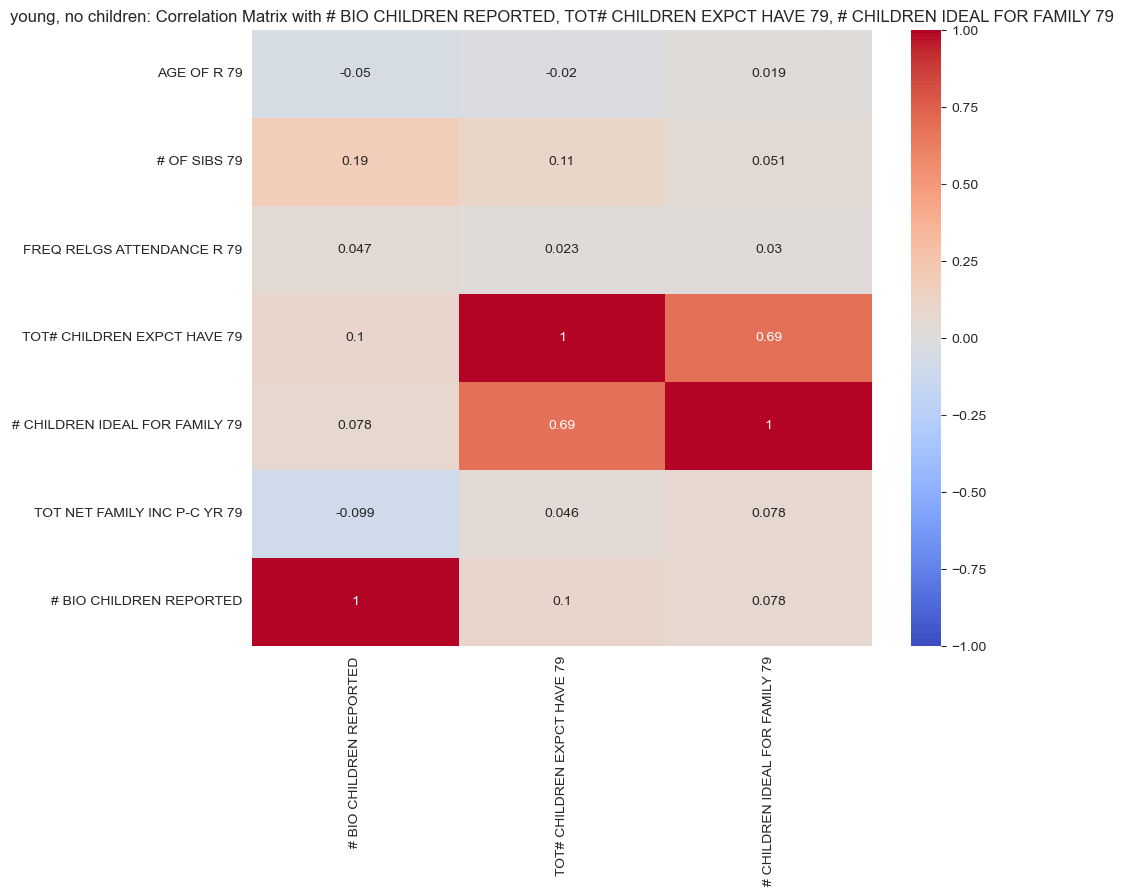

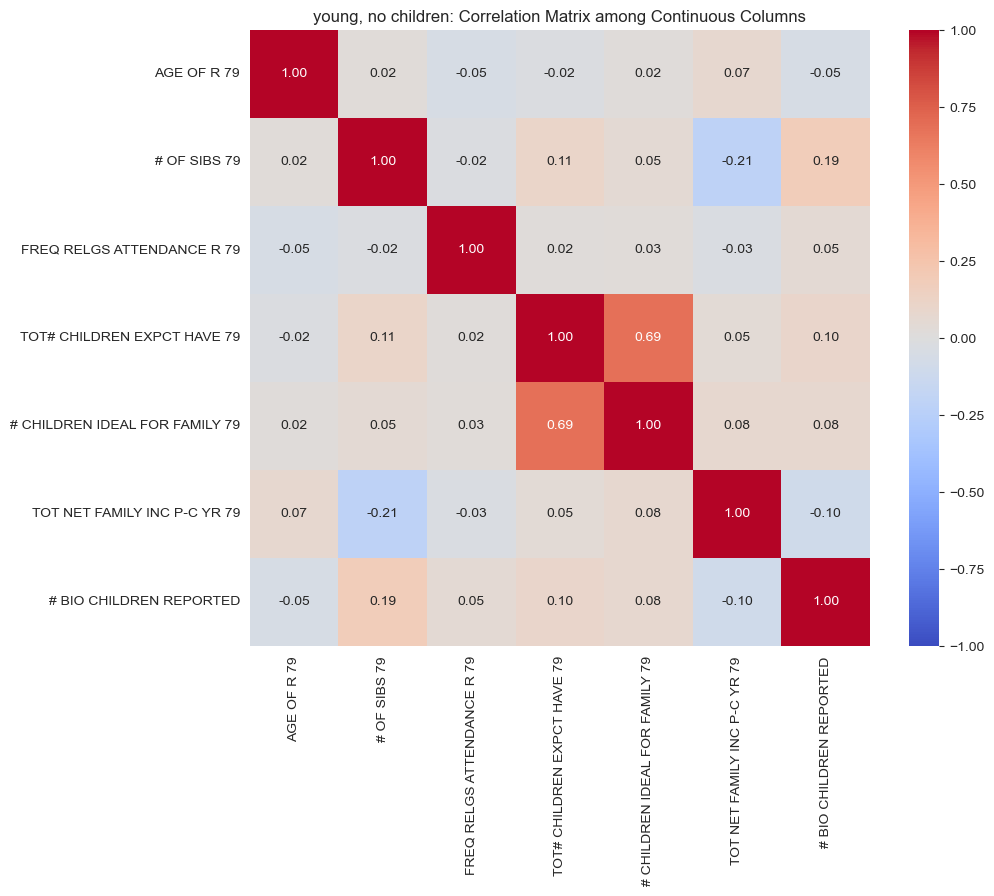

In [27]:
show_stats(df_young_no_children, "young, no children", continuous_columns)


 mature, no children 



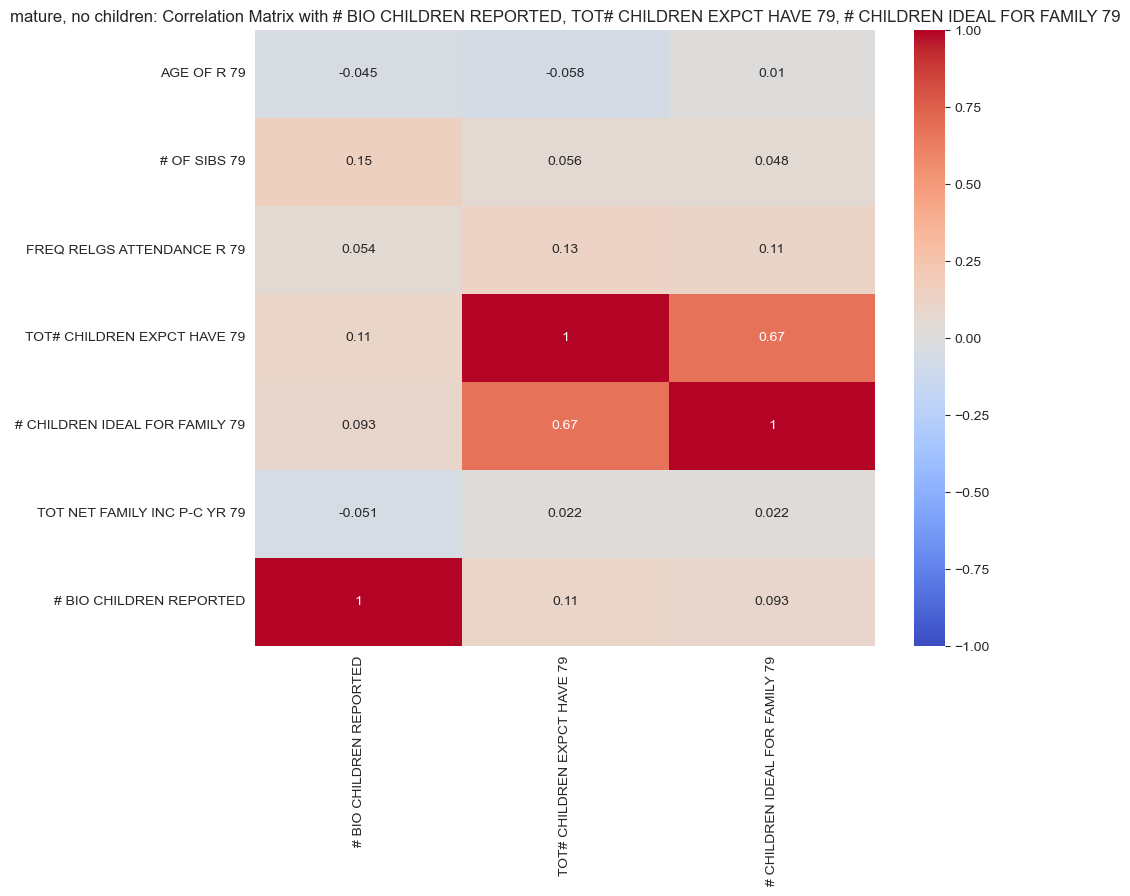

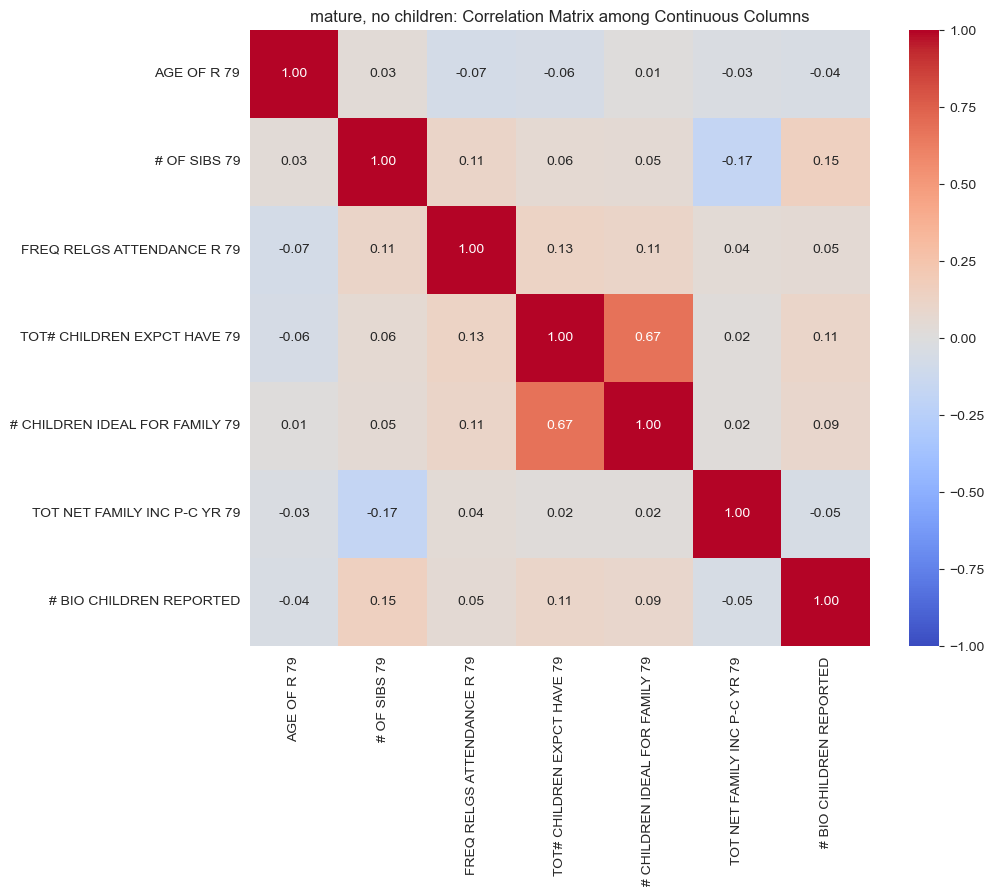

In [28]:
show_stats(df_mature_no_children, "mature, no children", continuous_columns)


 mature, with children 



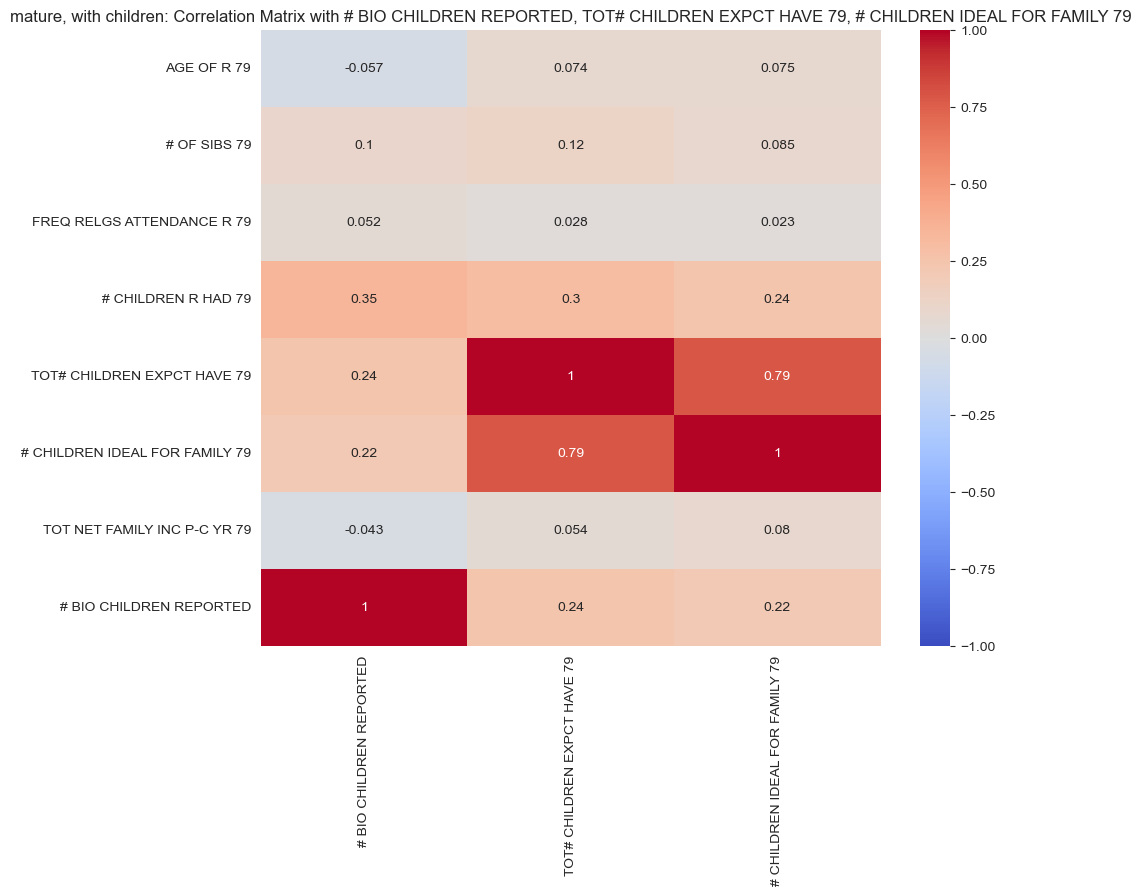

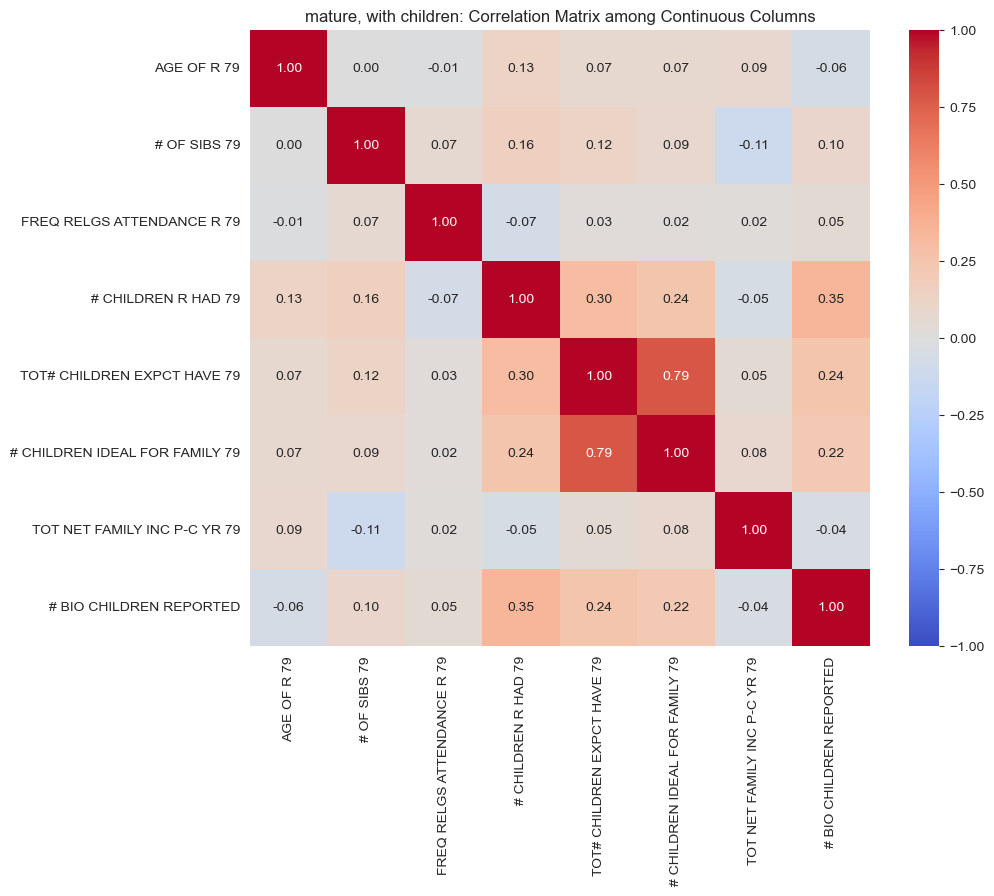

In [29]:
show_stats(df_mature_with_children, "mature, with children", continuous_columns, had_children=True)

# Preapring for training

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def prepare_for_train(df):
    # Process categorical variables
    df_one_hot = df.copy()
    df_one_hot = pd.get_dummies(df_one_hot, columns=df.select_dtypes('object').columns)
    df_one_hot[df_one_hot.select_dtypes('bool').columns] = df_one_hot[df_one_hot.select_dtypes('bool').columns].astype(int)
    return df_one_hot

def split_train_test(df_one_hot, with_test=True):
    # Split the data
    _ = df_one_hot.pop("ID# 79")
    X = df_one_hot
    Y = X.pop("# BIO CHILDREN REPORTED")
    
    if with_test:
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
    else:
        X_train = X
        Y_train = Y
        
    Y_train = Y_train.reset_index(drop=True)
    T1_train = X_train.pop("TOT# CHILDREN EXPCT HAVE 79")
    T2_train = X_train.pop("# CHILDREN IDEAL FOR FAMILY 79")
    T1_train = T1_train.reset_index(drop=True)
    T2_train = T2_train.reset_index(drop=True)
    
    if with_test:
        Y_test = Y_test.reset_index(drop=True)
        T1_test = X_test.pop("TOT# CHILDREN EXPCT HAVE 79")
        T2_test = X_test.pop("# CHILDREN IDEAL FOR FAMILY 79")
        T1_test = T1_test.reset_index(drop=True)
        T2_test = T2_test.reset_index(drop=True)

    # Standard Scaler
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_normalized = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
    
    if with_test:
        X_test_normalized = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
    else:
        X_test_normalized, Y_test, T_test = None, None, None
    
    return {'X_train_normalized': X_train_normalized,
           'X_test_normalized' : X_test_normalized,
           'Y_train' : Y_train,
           'Y_test' : Y_test,
           'T1_train': T1_train,
           'T1_test' : T1_test,
           'T2_train': T2_train,
           'T2_test' : T2_test}


In [31]:
def show_corr(df, title):
    corr_matrix = df.corr()

    plt.figure(figsize=(12, 16))

    corr_matrix["# BIO CHILDREN REPORTED"].sort_values().plot(kind='barh')

    # Add title and labels
    plt.title(title + 'Correlation between features to outcome (cateforical represented as one-hot)')
    plt.xlabel('correlation with outcome')
    plt.ylabel('feature')

    # Show the plot
    plt.show()

In [32]:
df_young_no_children_train = prepare_for_train(df_young_no_children)
df_mature_no_children_train = prepare_for_train(df_mature_no_children)
df_mature_with_children_train = prepare_for_train(df_mature_with_children)

In [33]:
df_mature_with_children_train

,ID# 79,AGE OF R 79,# OF SIBS 79,FREQ RELGS ATTENDANCE R 79,# CHILDREN IDEAL FOR FAMILY 79,# CHILDREN R HAD 79,TOT# CHILDREN EXPCT HAVE 79,TOT NET FAMILY INC P-C YR 79,# BIO CHILDREN REPORTED,AREA RESIDENCE @ AGE 14 URBAN/RURAL 79_IN COUNTRY-NOT FARM,...,REGION OF CURRENT RESIDENCE 79_NORTHEAST,REGION OF CURRENT RESIDENCE 79_SOUTH,REGION OF CURRENT RESIDENCE 79_WEST,ENROLLMT STAT MAY 1 SURVEY YR (REV) 79_ENROLLED IN COLLEGE,ENROLLMT STAT MAY 1 SURVEY YR (REV) 79_ENROLLED IN HIGH SCHOOL,"ENROLLMT STAT MAY 1 SURVEY YR (REV) 79_NOT ENROLLED, COMPLETED LESS THAN 12TH GRADE","ENROLLMT STAT MAY 1 SURVEY YR (REV) 79_NOT ENROLLED, HIGH SCHOOL GRADUATE",POVERTY STATUS 79_IN POVERTY,POVERTY STATUS 79_NOT IN POVERTY,POVERTY STATUS 79_UNKNOWN
85,86,18,7.0,1.0,4,1.0,4.0,1688,1,0,...,1,0,0,0,0,1,0,1,0,0
179,180,21,4.0,5.0,4,1.0,4.0,18698,3,0,...,1,0,0,0,0,0,1,0,1,0
203,204,21,5.0,1.0,1,1.0,2.0,13000,2,0,...,1,0,0,0,0,1,0,0,0,1
204,205,21,4.0,2.0,2,1.0,2.0,11960,3,0,...,1,0,0,0,0,0,1,0,1,0
207,208,20,3.0,1.0,2,1.0,2.0,7800,1,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12193,12194,22,3.0,1.0,4,1.0,4.0,3418,4,0,...,1,0,0,0,0,0,1,0,1,0
12210,12211,18,4.0,2.0,2,1.0,2.0,2400,1,0,...,0,1,0,0,0,1,0,1,0,0
12221,12222,21,3.0,4.0,3,4.0,4.0,2040,4,0,...,0,1,0,0,0,1,0,1,0,0
12292,12293,21,6.0,4.0,4,1.0,4.0,13000,4,1,...,0,0,1,0,0,1,0,0,0,1


In [34]:
import pickle


def save_complete_dataset(df_one_hot, path):
    """
    Saves dataset as csv file as dictionary with the correct X, T1, T2, Y partition
    :param df_one_hot: complete one-hot dataframe
    :param path: string
    """
    df = df_one_hot.copy(deep=True)
    # Split the data
    _ = df.pop("ID# 79")
    T1 = df.pop("TOT# CHILDREN EXPCT HAVE 79")
    T2 = df.pop("# CHILDREN IDEAL FOR FAMILY 79")
    Y = df.pop("# BIO CHILDREN REPORTED")
    X = df
    
    data = {
        'X': X,
        'T1': T1,
        'T2': T2,
        'Y': Y
    }
    
    with open(path, 'wb') as handle:
        pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [37]:
save_complete_dataset(df_young_no_children_train, './preprocessed_data/df_complete_young_no_children.pickle')
save_complete_dataset(df_mature_no_children_train, './preprocessed_data/df_complete_mature_no_children.pickle')
save_complete_dataset(df_mature_with_children_train, './preprocessed_data/df_complete_mature_with_children.pickle')

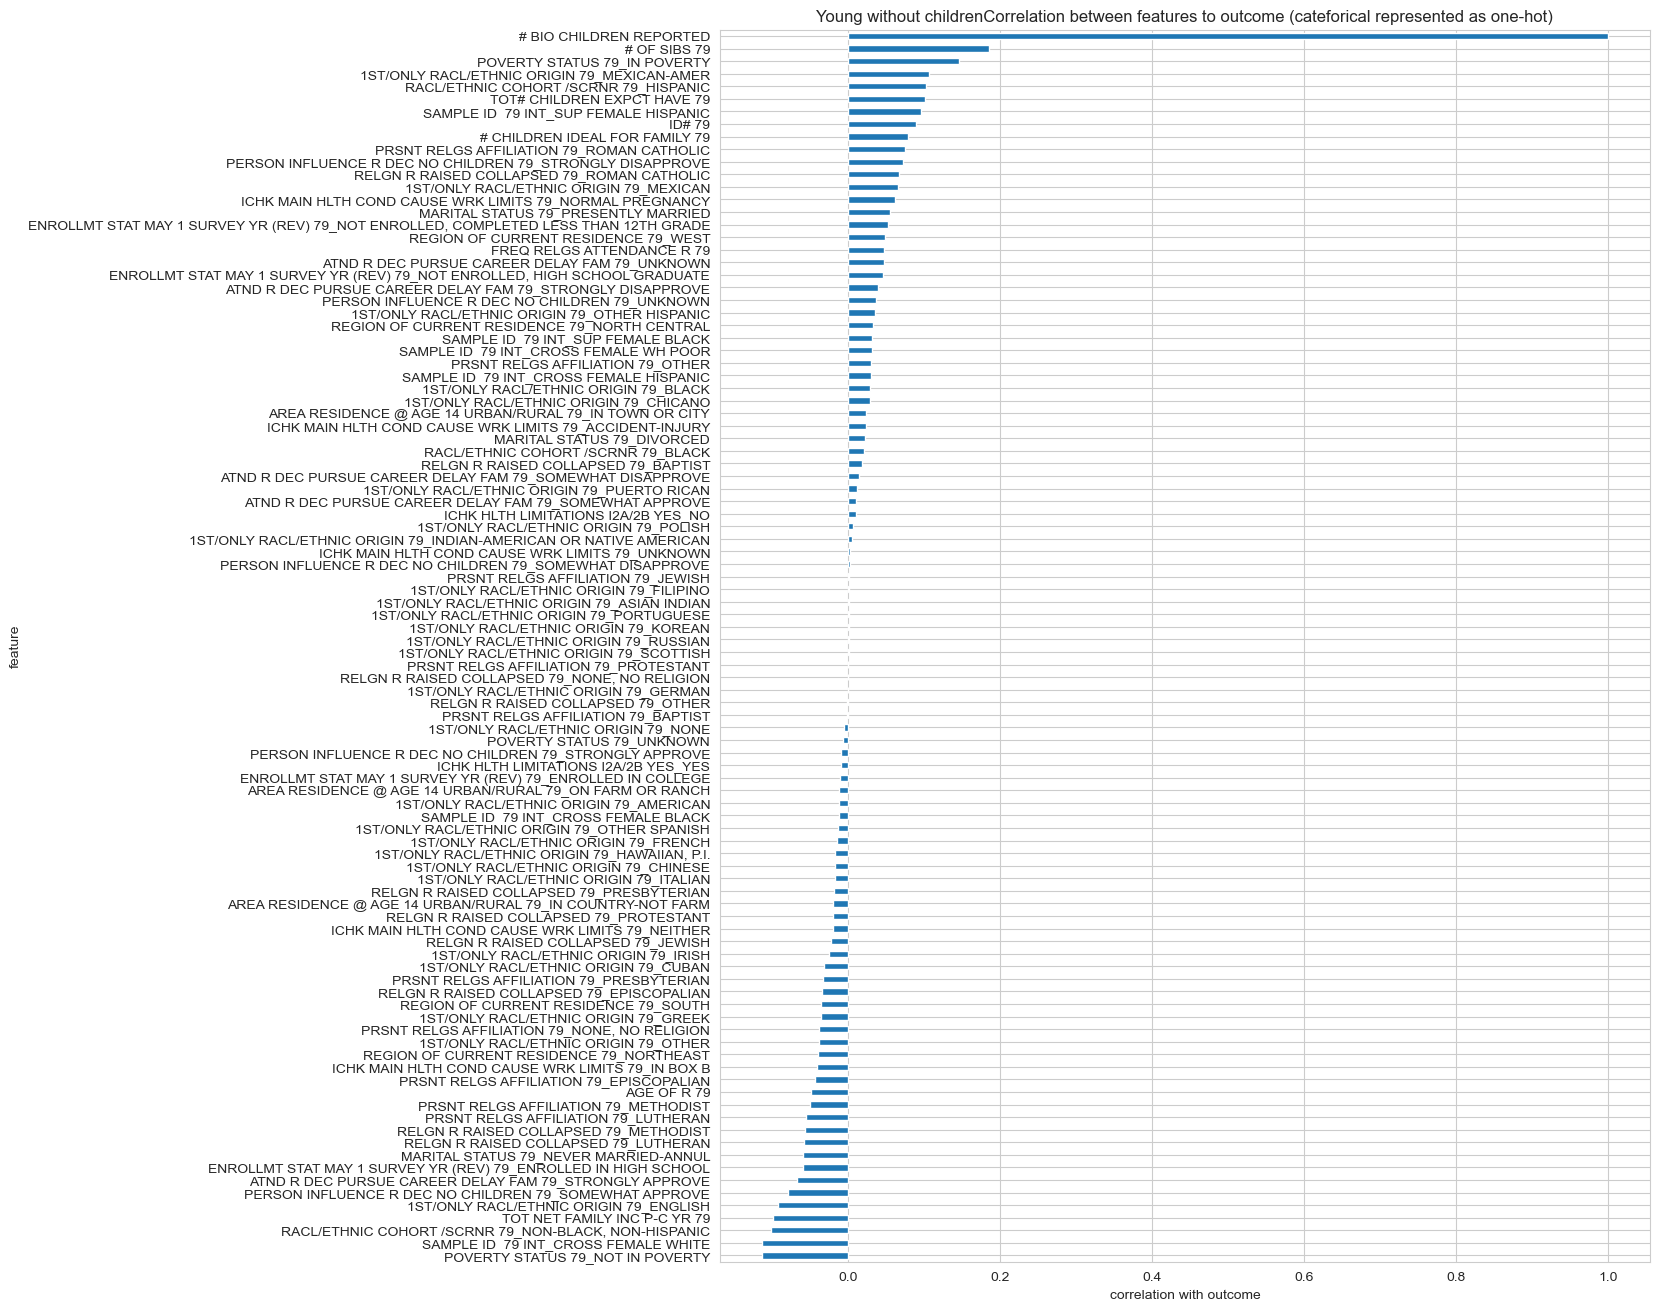

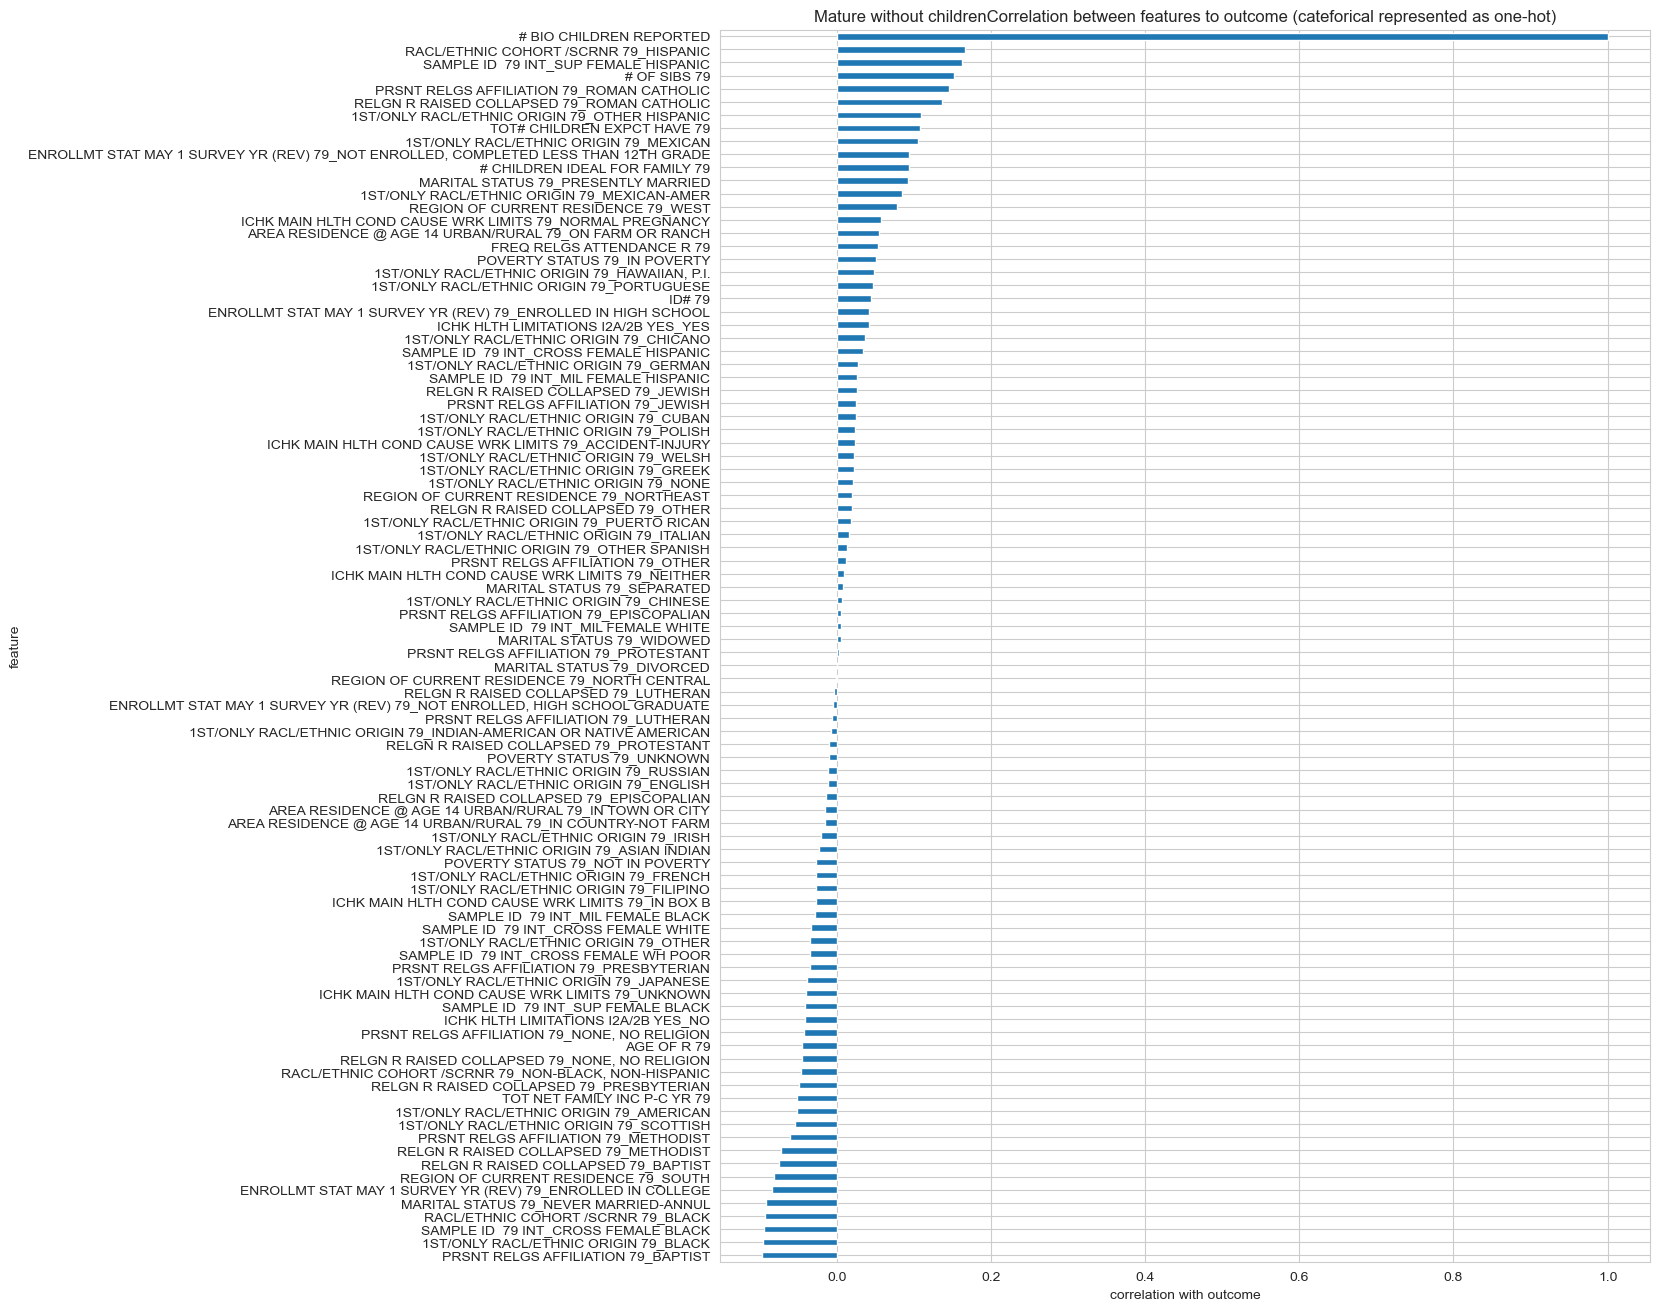

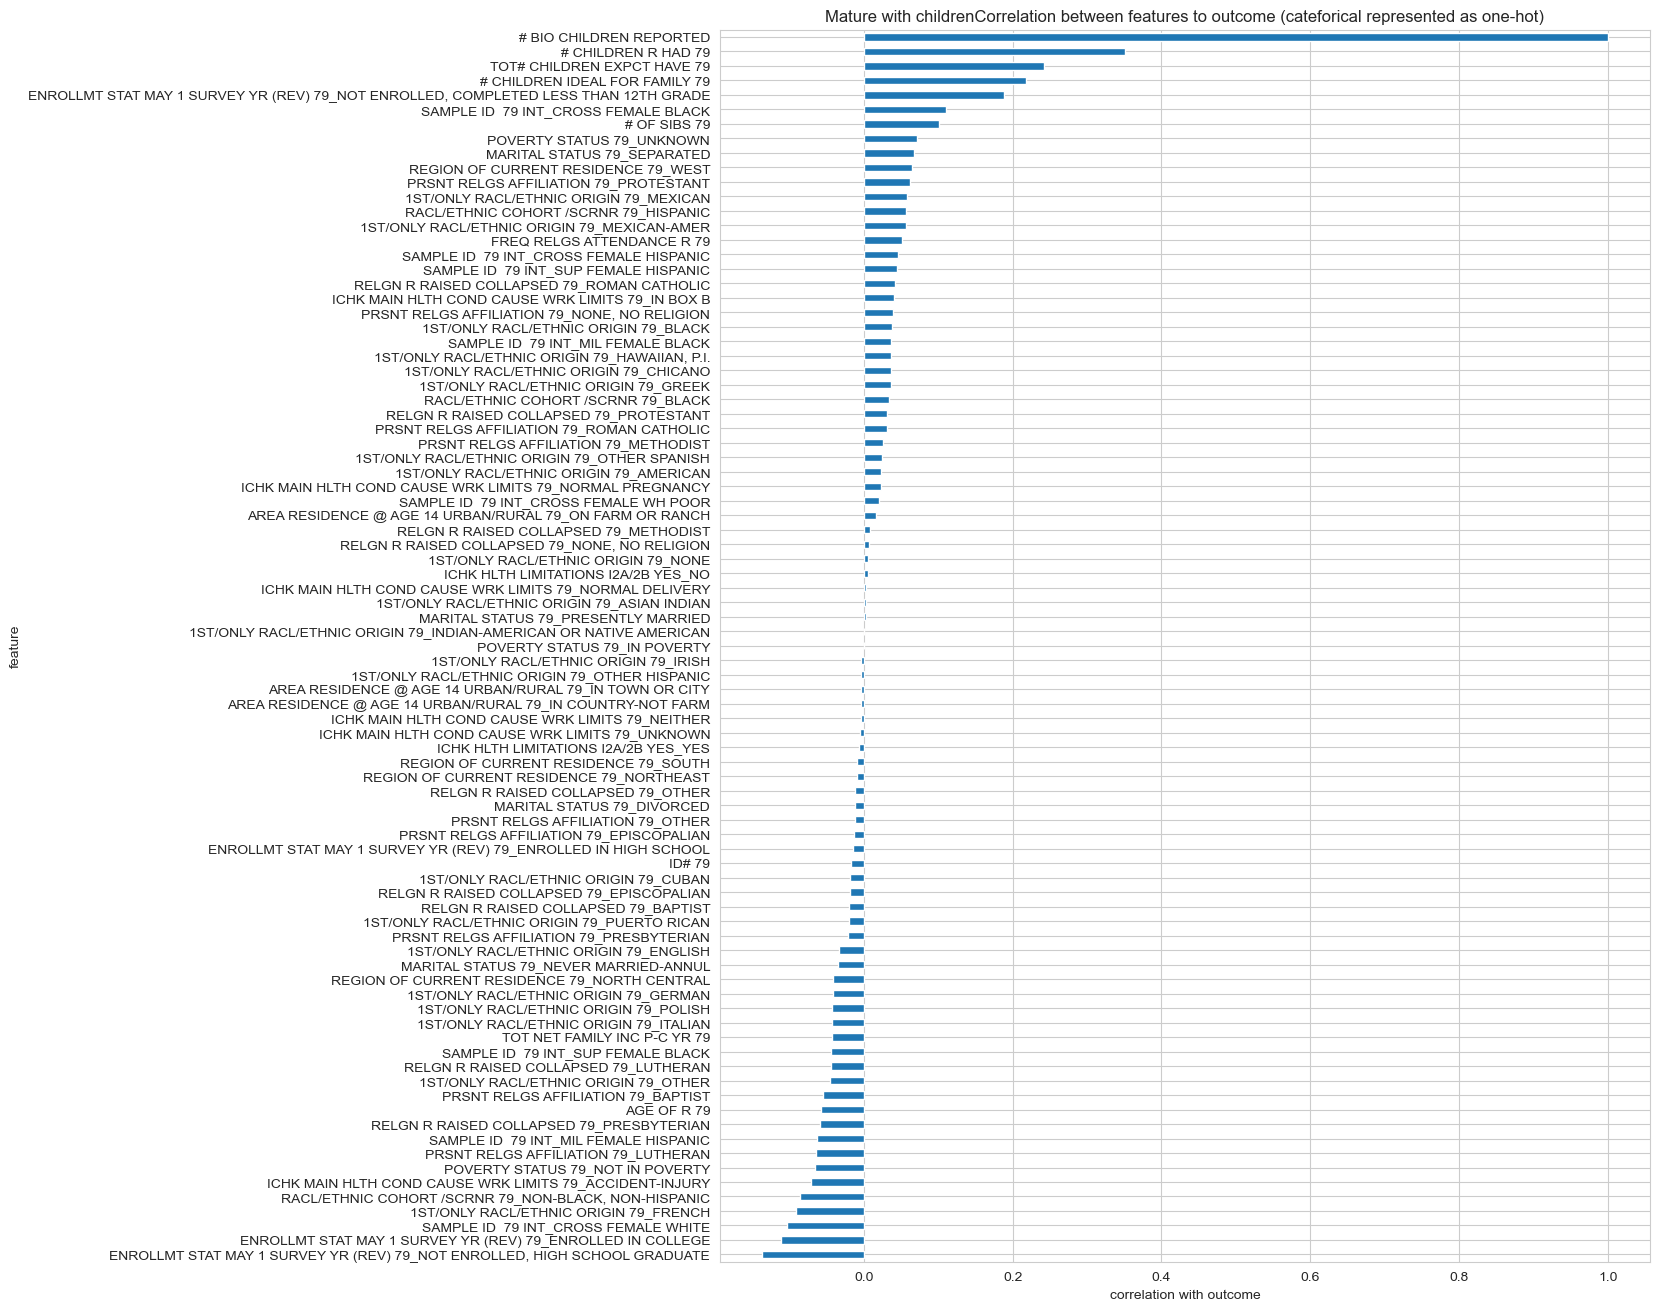

In [39]:
show_corr(df_young_no_children_train, "Young without children")
show_corr(df_mature_no_children_train, "Mature without children")
show_corr(df_mature_with_children_train, "Mature with children")

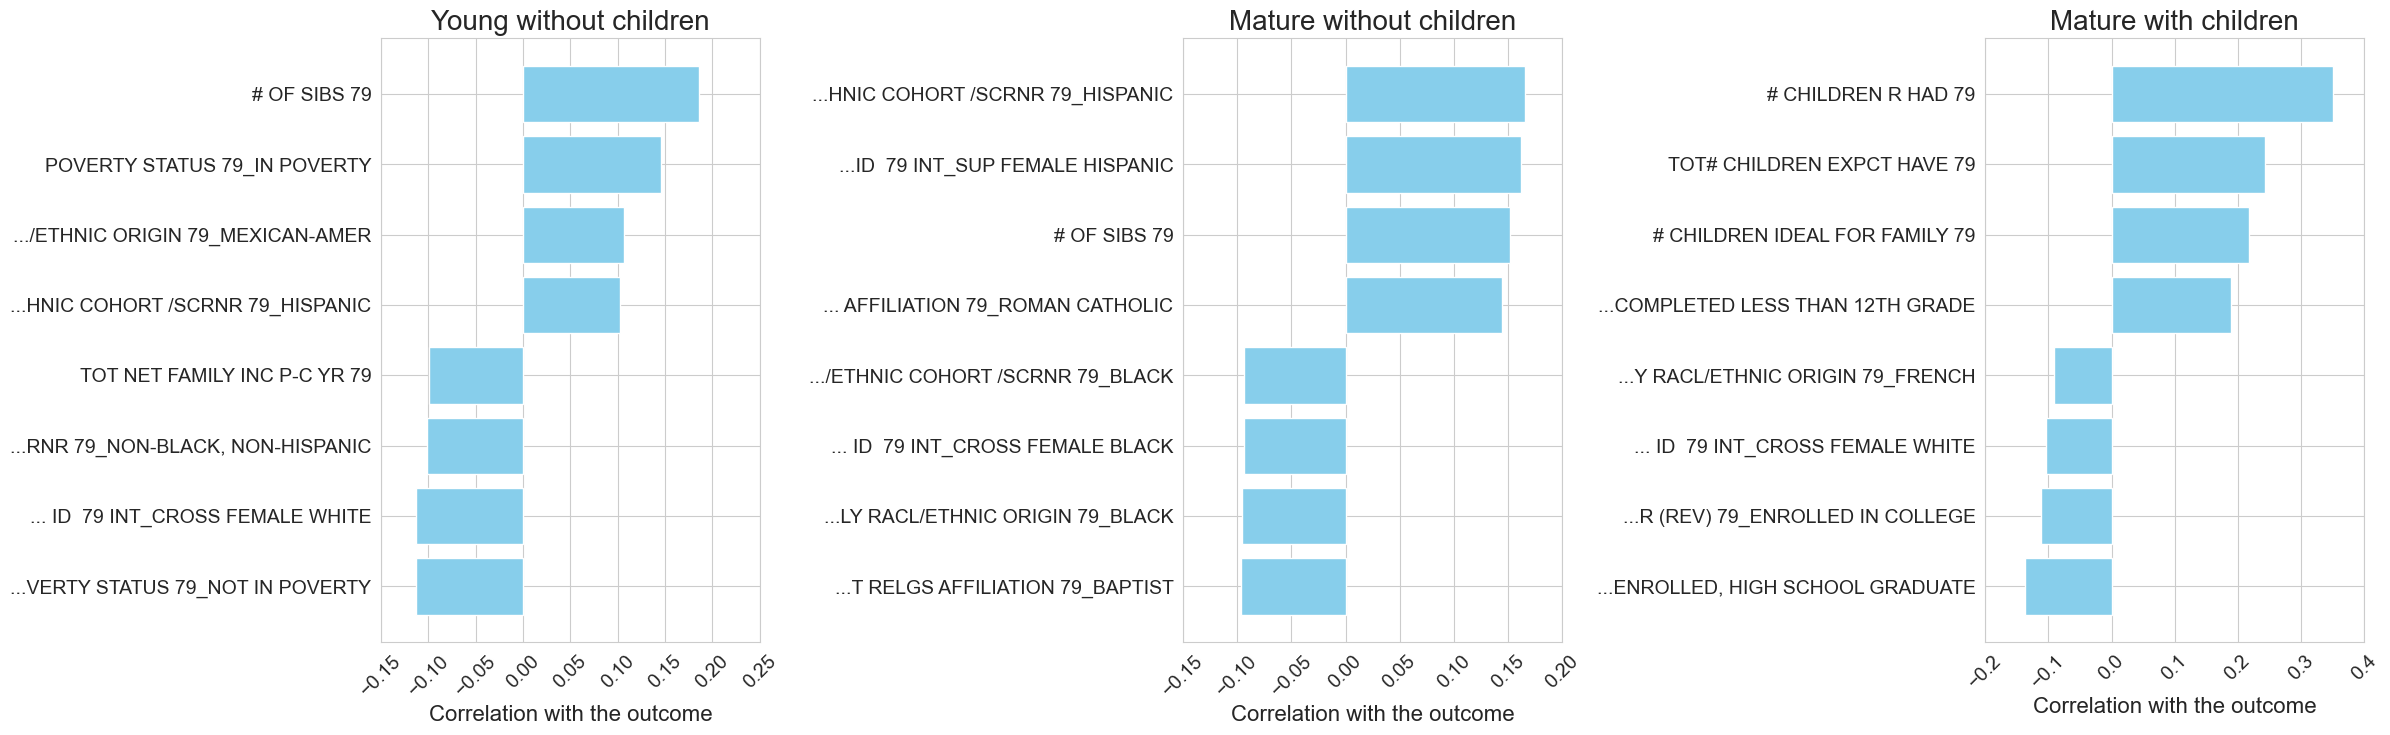

In [40]:
def show_corr_k_multiple(df1, df2, df3, title1, title2, title3, main_title, k, save_path):
    def plot_corr(ax, df, title, k):
        corr_matrix = df.corr()
        target_variable = "# BIO CHILDREN REPORTED"
        
        # Extract correlations with the target variable, excluding the target itself
        corr_with_target = corr_matrix[target_variable].dropna()
        corr_with_target = corr_with_target[corr_with_target.index != target_variable]
        
        # Sort correlations
        corr_with_target_sorted = corr_with_target.sort_values()
        
        # Get k features with smallest and largest correlations
        smallest_k = corr_with_target_sorted.head(k)
        largest_k = corr_with_target_sorted.tail(k)
        
        # Concatenate the two series
        selected_features = pd.concat([smallest_k, largest_k])
        
        # Truncate feature names longer than 30 characters
        truncated_labels = ['...' + label[-30:] if len(label) > 30 else label for label in selected_features.index]
        
        # Plot on the provided axis
        ax.barh(truncated_labels, selected_features, color='skyblue')
        
        # Add title and labels with increased font size
        ax.set_title(title, fontsize=20)
        ax.set_xlabel('Correlation with the outcome', fontsize=16)
        
        # Rotate the feature names for better readability
        ax.tick_params(axis='y', labelsize=14)
        ax.set_xticks(ax.get_xticks())
        ax.tick_params(axis='x', labelsize=14, rotation=45)

    # Create a figure with 3 subplots side by side
    fig, axes = plt.subplots(1, 3, figsize=(24, 8))  # Adjust figure size for 3 plots side by side

    # Create the 3 individual plots
    plot_corr(axes[0], df1, title1, k)
    plot_corr(axes[1], df2, title2, k)
    plot_corr(axes[2], df3, title3, k)

    # Set the main title for the entire figure
    fig.suptitle(main_title, fontsize=24)

    # Adjust layout to avoid overlapping
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    
    plt.savefig(save_path)

    # Show the plot
    plt.show()
    
    plt.close(fig)
    

    
k = 4
show_corr_k_multiple(df_young_no_children_train, df_mature_no_children_train, df_mature_with_children_train,
                     "Young without children", "Mature without children", "Mature with children", 
                     "", k, "corr_with_outcome.png")

In [41]:
# save processed data with train test split

import pickle

df_young_no_children_dict = split_train_test(df_young_no_children_train)
with open('./preprocessed_data/df_young_no_children_dict.pickle', 'wb') as handle:
    pickle.dump(df_young_no_children_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

df_mature_no_children_dict = split_train_test(df_mature_no_children_train)
with open('./preprocessed_data/df_mature_no_children_dict.pickle', 'wb') as handle:
    pickle.dump(df_mature_no_children_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

df_mature_with_children_dict = split_train_test(df_mature_with_children_train)
with open('./preprocessed_data/df_mature_with_children_dict.pickle', 'wb') as handle:
    pickle.dump(df_mature_with_children_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
    

for key in df_young_no_children_dict:
    print(key, df_young_no_children_dict[key].shape)

X_train_normalized (1236, 94)
X_test_normalized (219, 94)
Y_train (1236,)
Y_test (219,)
T1_train (1236,)
T1_test (219,)
T2_train (1236,)
T2_test (219,)


In [48]:
# save processed data without splitting it

import pickle

with open('./preprocessed_data/df_young_no_children_no_split.pickle', 'wb') as handle:
    pickle.dump(df_young_no_children_train, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('./preprocessed_data/df_mature_no_children_no_split.pickle', 'wb') as handle:
    pickle.dump(df_mature_no_children_train, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('./preprocessed_data/df_mature_with_children_no_split.pickle', 'wb') as handle:
    pickle.dump(df_mature_with_children_train, handle, protocol=pickle.HIGHEST_PROTOCOL)

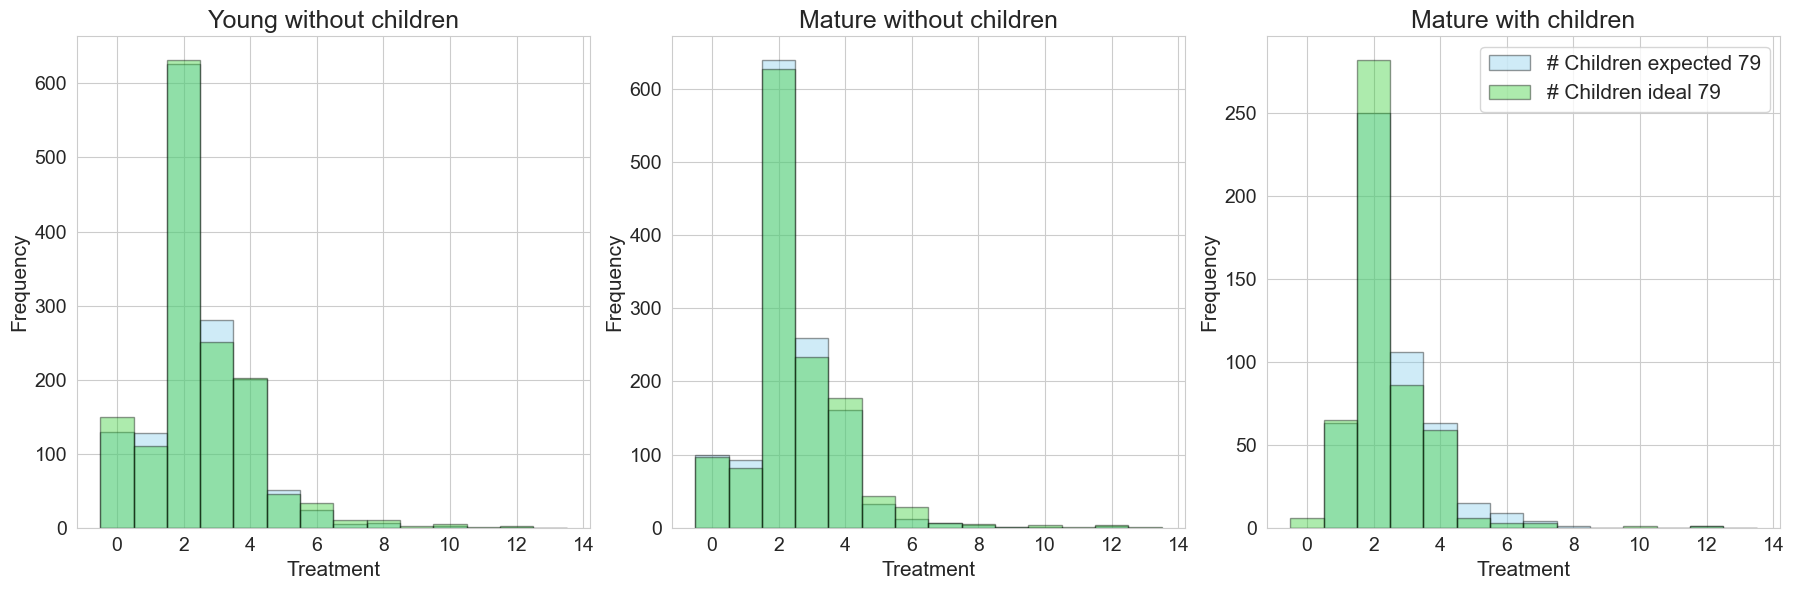

In [43]:
import matplotlib.pyplot as plt

def plot_histograms(series1, series2, series3, title1, title2, title3, save_path, colors=('skyblue', 'limegreen')):
    # Set the size of axis labels and titles
    label_size = 15
    title_size = 18
    tick_size = 14

    # Create a figure and subplots to hold the histograms
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Extract the keys from the dictionaries (assuming the same keys in all series)
    keys = list(series1.keys())

    # Plot the histograms for each series
    for i, (series, title, ax) in enumerate(zip([series1, series2, series3], [title1, title2, title3], axes)):
        # For each key in the dictionary, plot the corresponding histograms on the same subplot
        for j, key in enumerate(keys):
            ax.hist(series[key], bins=np.arange(15) - 0.5, color=colors[j], edgecolor='black', alpha=0.4, label=key)
        ax.set_title(title, fontsize=title_size)
        ax.set_xlabel('Treatment', fontsize=label_size)
        ax.set_ylabel('Frequency', fontsize=label_size)
        ax.tick_params(axis='both', labelsize=tick_size)
        
        # Only show the legend on the third subplot (series3)
        if i == 2:
            ax.legend(fontsize=label_size)

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Save the figure to the given path
    plt.savefig(save_path)

    # Show the plot
    plt.show()

    # Close the plot to free up memory
    plt.close(fig)

    
series1 = {"# Children expected 79" : pd.concat([df_young_no_children_dict['T1_train'], df_young_no_children_dict['T1_test']], axis=0),
           "# Children ideal 79" : pd.concat([df_young_no_children_dict['T2_train'], df_young_no_children_dict['T2_test']], axis=0)}

series2 = {"# Children expected 79" : pd.concat([df_mature_no_children_dict['T1_train'], df_mature_no_children_dict['T1_test']], axis=0),
           "# Children ideal 79" : pd.concat([df_mature_no_children_dict['T2_train'], df_mature_no_children_dict['T2_test']], axis=0)}

series3 = {"# Children expected 79" : pd.concat([df_mature_with_children_dict['T1_train'], df_mature_with_children_dict['T1_test']], axis=0),
           "# Children ideal 79" : pd.concat([df_mature_with_children_dict['T2_train'], df_mature_with_children_dict['T2_test']], axis=0)}
        
plot_histograms(series1=series1,
                series2=series2,
                series3=series3,
                title1="Young without children",
                title2="Mature without children",
                title3="Mature with children",
                save_path="T_histogram.png")

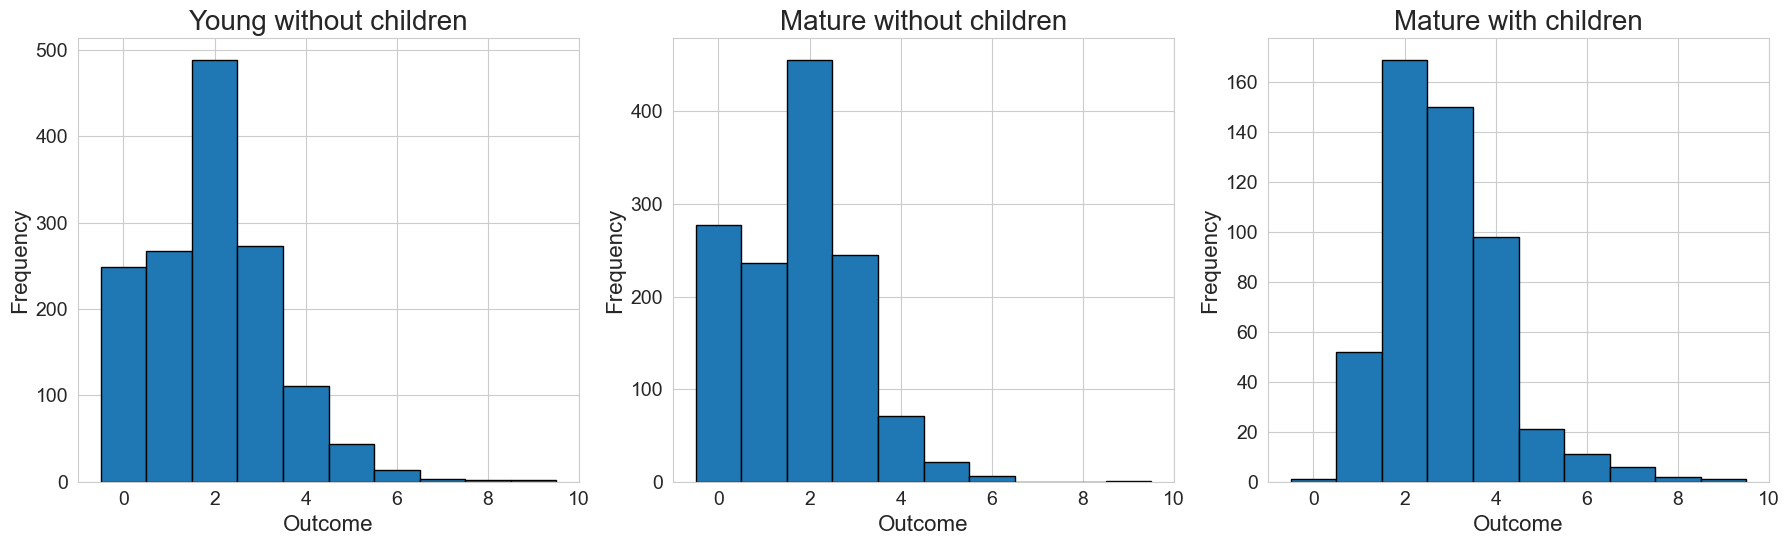

In [44]:
def plot_outcome_histograms(series1, series2, series3, title1, title2, title3, x_axis_name, main_title, save_path):
    # Set font sizes
    main_title_size = 24
    title_size = 20
    label_size = 16
    tick_size = 14
    
    # Create figure and subplots for side-by-side histograms
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Set the main title for the entire figure
    fig.suptitle(main_title, fontsize=main_title_size)

    # Define a function to plot histogram for each series
    def plot_hist(ax, series, title):
        # Create the histogram with large font sizes
        ax.hist(series, bins=np.arange(11) - 0.5, edgecolor='black')

        # Set the title and axis labels with large font sizes
        ax.set_title(title, fontsize=title_size)
        ax.set_xlabel(x_axis_name, fontsize=label_size)
        ax.set_ylabel('Frequency', fontsize=label_size)
        
        # Set tick parameters for larger fonts
        ax.tick_params(axis='both', which='major', labelsize=tick_size)
    
    # Plot histograms for each series
    plot_hist(axes[0], series1, title1)
    plot_hist(axes[1], series2, title2)
    plot_hist(axes[2], series3, title3)

    # Adjust layout to avoid overlap, and add space for the main title
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    
    # Show the plot
    plt.savefig(save_path)
    plt.show()
    plt.close(fig)


plot_outcome_histograms(series1=pd.concat([df_young_no_children_dict['Y_train'], df_young_no_children_dict['Y_test']], axis=0),
                        series2=pd.concat([df_mature_no_children_dict['Y_train'], df_mature_no_children_dict['Y_test']], axis=0),
                        series3=pd.concat([df_mature_with_children_dict['Y_train'], df_mature_with_children_dict['Y_test']], axis=0),
                        main_title="",
                        title1="Young without children",
                        title2="Mature without children",
                        title3="Mature with children",
                        x_axis_name="Outcome",
                        save_path="outcome_histogram.png")